서포트 벡터 머신(SVM)은 결정 경계 주변의 서포트 벡터와의 마진을 최대화해서 최적화하는 알고리즘 이다. 자세한 설명은 아래 영상 참고
- [SVM 개념 설명](https://www.youtube.com/watch?v=y4CYcpRiNsw&t=1s)

붓꽃 데이터셋의 꽃 분류 문제에 SVM 모델을 훈련하면 다음과 같다.

In [1]:
# 데이터 로드 및 표준화

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = datasets.load_iris()     # 붓꽃 데이터 로드
x = iris.data[:, [2, 3]]        # 꽃잎길이, 꽃잎너비 특성을 x에 할당
y = iris.target                 # 꽃 품종에 해당하는 클래스 레이블을 y에 할당
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()   # 특성 표준화(스케일 조정)을 위해서 StandardScaler 클래스를 사용
sc.fit(x_train)         # fit 함수는 각 특성의 차원마다 평균과 표준편차를 계산한다.
x_train_std = sc.transform(x_train) # transform 함수는 평균과 표준편차를 사용해서 특성을 표준화한다.
x_test_std = sc.transform(x_test)   # 테스트 세트도 같은 비율로 이동(표준화)되도록 같은 평균과 표준편차를 사용한다.
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

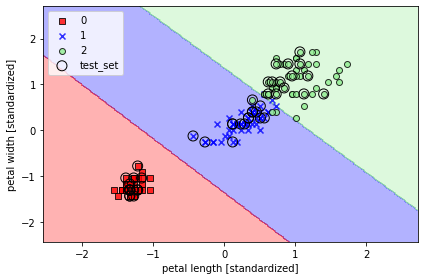

In [4]:
# SVM 모델을 훈련

from common import utils
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(x_train_std, y_train)
utils.plot_decision_regions(x_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()